In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
from matplotlib import cm
import seaborn as sb
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
import time

In [37]:


start = time.time()


def string(rpm,wob,a):


    N=5                                # number of elements required


    MD=3000                            # total depth measured depth
    
    L=0.90*MD                          # lenght of pipe section is considered 10% 
    l_pipe =L/(N-1)                    # lenght of pipe element in meters 

    
    

    l_BHA=0.10*MD                 # lenght of BHA element

    do=0.11                            # drillstring outer diameter in meters   # 1 cm thick ness 
    di=0.1                             # drill string inner diamter in meters   # 4 cm thick ness
    Do=0.13                            # BHA outer dia in meters
    Di=0.09                            # BHA inner dia in meters

    E_BHA = 193e9                      # modulus of elastivity of steel alloy


    G_BHA=77e9                         # shear modulus steel

    ro_st=7990                         # density of steel

    A_pipe=(np.pi/4)*(do**2-di**2)     # area  of pipe element 
    A_BHA=(np.pi/4)*(Do**2-Di**2)      # area of bha   element

    J_pipe=(np.pi/32)*(do**4-di**4)    # ploar moment of inertia for pipe  used in torison
    J_BHA=(np.pi/32)*(Do**4-Di**4)     # ploar moment of inertia for BHA   used in torios


    I_z_pipe=(np.pi/64)*(do**4-di**4)  # moment of inertia of pipe used in bending
    I_z_BHA=(np.pi/64)*(Do**4-Di**4)   # moment of inertia of BHA  used in benidng 



    E_pipe=E_BHA    # the material properties for pipe and BHA are cosnidered to be steel 
    G_pipe=G_BHA
    ro_al=ro_st

    K1_pipe = (E_pipe*A_pipe)/l_pipe           # axial force 

    K2_pipe = 12*E_pipe*I_z_pipe/l_pipe**3     # lateral and bending 

    K3_pipe = G_pipe*J_pipe/l_pipe             # torsion 
    
    

    # stifness matrix for single element of pipe
    Ke_pipe=np.array([[K1_pipe,  0,         0,                  0,   -K1_pipe,    0,            0,                  0],
                     [ 0,     K2_pipe,   1/2*K2_pipe*l_pipe,    0,      0,      -K2_pipe,      1/2*K2_pipe*l_pipe,  0],
                     [ 0,     1/2*l_pipe*K2_pipe,          1/3*l_pipe**2*K2_pipe,  0,      0,  -1/2*K2_pipe*l_pipe,   1/6*K2_pipe*l_pipe**2, 0],
                     [ 0 ,      0,          0,              K3_pipe,    0,         0,           0,                   -K3_pipe],
                     [-K1_pipe,  0,         0,                  0,   K1_pipe,      0,           0,                   0],
                     [ 0,       -K2_pipe,  -1/2*K2_pipe*l_pipe, 0,      0,         K2_pipe,     -1/2*K2_pipe*l_pipe,  0 ], 
                     [ 0,   1/2*l_pipe*K2_pipe, 1/6*K2_pipe*l_pipe**2,0,0,-1/2*K2_pipe*l_pipe,(1/3)*(l_pipe**2)*K2_pipe,0],
                     [ 0 ,      0,          0,              -K3_pipe,    0,         0,           0,                   K3_pipe]])

    # stifness matrix for single element of BHA

    K1_BHA = (E_BHA*A_BHA)/l_BHA
    K2_BHA = 12*E_BHA*I_z_BHA/l_BHA**3
    K3_BHA = G_BHA*J_BHA/l_BHA

    Ke_BHA=np.array([[K1_BHA,  0,         0,                  0,   -K1_BHA,    0,            0,                  0],
                     [ 0,     K2_BHA,   1/2*K2_BHA*l_BHA,    0,      0,      -K2_BHA,      1/2*K2_BHA*l_BHA,  0],
                     [ 0,     1/2*l_BHA*K2_BHA,          1/3*l_BHA**2*K2_BHA,  0,      0,  -1/2*K2_BHA*l_BHA,   1/6*K2_BHA*l_BHA**2, 0],
                     [ 0 ,      0,          0,              K3_BHA,    0,         0,           0,                   -K3_BHA],
                     [-K1_BHA,  0,         0,                  0,   K1_BHA,      0,           0,                   0],
                     [ 0,       -K2_BHA,  -1/2*K2_BHA*l_BHA, 0,      0,         K2_BHA,     -1/2*K2_BHA*l_BHA,  0 ], 
                     [ 0,   1/2*l_BHA*K2_BHA, 1/6*K2_BHA*l_BHA**2,0,0,-1/2*K2_BHA*l_BHA,(1/3)*(l_BHA**2)*K2_BHA,0],
                     [ 0 ,      0,          0,              -K3_BHA,    0,         0,           0,                   K3_BHA]])


    
    
    
    # mass matrix for pipe 
    b = ro_al*A_pipe*l_pipe/420
    c_pipe=ro_al*J_pipe*l_pipe
    Me_pipe = np.array([[b*140,0,0,0,b*70,0,0,0],
                       [0, b*156,  22*l_pipe*b, 0, 0, 54*b, -13*l_pipe*b ,0],
                       [0,22*l_pipe*b,4*l_pipe**2*b,0,0,13*l_pipe*b,-3*l_pipe**2*b,0],
                       [0,0,0,c_pipe/3,0,0,0,c_pipe/6],
                       [b*70,0,0,0,b*140,0,0,0],
                       [0,54*b,13*l_pipe*b,0,0,156*b,-22*l_pipe*b,0],
                       [0,-13*l_pipe,-3*l_pipe**2*b,0,0,-22*l_pipe*b,4*l_pipe**2*b,0],
                       [0,0,0,c_pipe/6,0,0,0,c_pipe/3]])
    
    
    # mass matrix for BHA 

    b = ro_st*A_BHA*l_BHA/420
    c_BHA=ro_st*J_BHA*l_BHA

    Me_BHA = np.array([[b*140,0,0,0,b*70,0,0,0],
                       [0, b*156,  22*l_BHA*b, 0, 0, 54*b, -13*l_BHA*b ,0],
                       [0,22*l_BHA*b,4*l_BHA**2*b,0,0,13*l_BHA*b,-3*l_BHA**2*b,0],
                       [0,0,0,c_BHA/3,0,0,0,c_BHA/6],
                       [b*70,0,0,0,b*140,0,0,0],
                       [0,54*b,13*l_BHA*b,0,0,156*b,-22*l_BHA*b,0],
                       [0,-13*l_BHA,-3*l_BHA**2*b,0,0,-22*l_BHA*b,4*l_BHA**2*b,0],
                       [0,0,0,c_BHA/6,0,0,0,c_BHA/3]])




    incl=np.zeros(N)   # iclination require for each element

    incl=(np.pi/180)*incl   # converting degrees to radiands




    K=np.zeros((N+(7+3*(N-1)),N+(7+3*(N-1))))  # golbal stifness matrix with number of elements 
    M=np.zeros((N+(7+3*(N-1)),N+(7+3*(N-1))))  # global mass matrix with number of elements 

    row=[]
    col=[]

    for i in range (N):
        if(i<N-1):
      
            c=np.cos(incl[i])
            s=np.sin(incl[i])
            # transformation matrix for 2D 
            T=np.array([[c,s,0,0,0,0,0,0],
                       [-s,c,0,0,0,0,0,0],
                       [0,0,1,0,0,0,0,0],
                       [0,0,0,1,0,0,0,0],
                       [0,0,0,0,c,s,0,0],
                       [0,0,0,0,-s,c,0,0],
                       [0,0,0,0,0,0,1,0],
                       [0,0,0,0,0,0,0,1]])
            k_f=np.transpose(T)@Ke_pipe@T
            M_f=np.transpose(T)@Me_pipe@T

        else:
            c=np.cos(incl[i])
            s=np.sin(incl[i])
            T=np.array([[c,s,0,0,0,0,0,0],
                       [-s,c,0,0,0,0,0,0],
                       [0,0,1,0,0,0,0,0],
                       [0,0,0,1,0,0,0,0],
                       [0,0,0,0,c,s,0,0],
                       [0,0,0,0,-s,c,0,0],
                       [0,0,0,0,0,0,1,0],
                       [0,0,0,0,0,0,0,1]])
            k_f=np.transpose(T)@Ke_BHA@T
            M_f=np.transpose(T)@Me_BHA@T

        i=4*i
        c= np.array([i,i,i,i,i,i,i,i,i+1,i+1,i+1,i+1,i+1,i+1,i+1,i+1,i+2,i+2,i+2,i+2,i+2,i+2,i+2,i+2,i+3,i+3,i+3,i+3,i+3,i+3,i+3,i+3,
                    i+4,i+4,i+4,i+4,i+4,i+4,i+4,i+4,i+5,i+5,i+5,i+5,i+5,i+5,i+5,i+5,i+6,i+6,i+6,i+6,i+6,i+6,i+6,i+6,
                    i+7,i+7,i+7,i+7,i+7,i+7,i+7,i+7])
        row.append(c)
        d =np.array([i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,
                    i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,i,i+1,i+2,i+3,i+4,i+5,i+6,i+7])
        col.append(d)
        data_stifness=k_f.flatten()
        data_mass=M_f.flatten()
        i=int(i/4)
        K=K+coo_matrix((data_stifness, (row[i], col[i])), shape=((N+(7+3*(N-1)), N+(7+3*(N-1))))).toarray()
        M=M+coo_matrix((data_mass, (row[i], col[i])), shape=((N+(7+3*(N-1)), N+(7+3*(N-1))))).toarray()


    
    mu_d=0.03  #dynamic friction factor
    mu_s=0.3   #static friction factor
    Pf=0.3

    radius=0.2159     # radius of bit it meter 8.5 inch

    dt=l_pipe*np.sqrt(ro_st/E_BHA)  #time interval


    ####################################################################
    t=300                   # total time to run simulation
    n=np.int(t/dt)          #number of steps                      ########################
                                                                  #                     #
    #WOB=3000                                                     #  inputs to change   #
                                                                  #######################
    Vel_in=rpm          #rpm 



    C=np.zeros((len(K),len(K)))
    C=0.000*M+0.000*K             # damping matrix 

    #######################################################################
    sdof=len(K)
    depl = np.zeros((n,sdof,1)) 
    vel = np.zeros((n,sdof,1))             # array decleartions
    accl = np.zeros((n,sdof,1)) 
    F=np.zeros((n,sdof,1)) 
    mu=np.zeros((n,1))
    Reff = np.zeros((n,sdof,1)) 
    vel_dup = np.zeros((n,sdof,1)) 
    
    exi=np.zeros(n)                        # for random exicatiations
    ####################################################################

    # intial assumptions at time step zero
    mu[0:3]=mu_d
    depl[0]=0 
    vel[0]=0
    dd=(F[0,:]-K@depl[0,:]-C@vel[0,:])
    accl[0,:]=np.linalg.inv(M)@dd
    
    
    # wilson theta method constants 

    tita = 1.42

    a0 = 6/(tita*dt)**2 ; a1 = 3/(tita*dt);     a2 = 2*a1

    a3 = tita*dt/2 ;      a4 = a0/tita;       a5 = -a2/tita ;

    a6 = 1-3/tita ;      a7 = dt/2 ;   a8 = dt**2/6 ;

    Keff = K+a1*C+a0*M    # tangent stiffness 
    
    

    weight=np.zeros(n)
    # the boundary conditions are first node all 4 DOF are constained and last node torque due to friction is applied 
    
    # wob=applied wob from surface 

    wob_b=wob*np.exp(-0.35*incl[-1]-incl[-2])    # available downhole wob_B 
    
    
   
    # caluclating cutting component of torque  ########################
    c1=1.35*10**-8
    c2=1.95*10**-4
    F0=-wob_b
    ROP=c1*wob*np.sqrt(Vel_in)+c2
    gamma_c=2*np.pi*ROP/Vel_in
    alpha=np.sqrt(gamma_c/radius)
    
    ####################################################################

    
   
    S0=250         # white noise intensity
    
    for it in range(1,n-1):


        exi[it]=np.random.randn()*np.sqrt(2*np.pi*S0/dt)     
        

        F[it+1,-1]=-((wob_b*(mu[it,0]+alpha)*radius+(a*(np.random.randn()*np.sqrt(2*np.pi*S0/dt)))))

        Reff[it,:]=F[it,:]+(tita*(F[it+1,:]-F[it,:]))+(M@(a0*depl[it,:]+a2*vel[it,:]+2*accl[it,:]))+\
                               (C@(a1*depl[it,:]+2*vel[it,:]+a3*accl[it,:]))


        Reff[it,3]=Vel_in*dt
        depl[it+1,:] =np.linalg.inv(Keff)@Reff[it,:]


        depl[it+1,0]=0   #axial
        depl[it+1,1]=0   # laterla
        depl[it+1,2]=0   #bending
        depl[it+1,3]=0   #trosion

        accl[it+1,:]=a4*(depl[it+1,:]-depl[it,:])+(a5*(vel[it,:])+a6*accl[it,:])

        vel[it+1,:]=vel[it,:]+(a7*(accl[it+1,:]+accl[it,:]))



        depl[it+1,:]=depl[it,:]+(dt*vel[it,:])+(a8*(accl[it+1,:]+2*accl[it,:]))


        vel[it+1,-1]=vel[it+1,-1]+Vel_in

        if vel[it+1,-1]<0:
            vel[it+1,-1]=0
            mu[it+1,0]=0.3

        else:       

            aaa=math.tanh(vel[it+1,-1])


            bb=(2*vel[it+1,-1])/(1+(vel[it+1,-1])**2)

            cc=0.01*vel[it+1,-1]

            mu[it+1,0]=0.3*(aaa+bb+cc)

            

        vel[it+1,-1]=vel[it+1,-1]-Vel_in
        vel_dup[it+1,-1]=vel[it+1,-1]+Vel_in



    



    max_vel=np.max(vel[:,-1].flatten()[argrelextrema(vel[:,-1].flatten(), np.greater)[0]])

    min_vel=np.min(vel[:,-1].flatten()[argrelextrema(vel[:,-1].flatten(), np.less)[0]])


    SS=(max_vel-min_vel)/2/Vel_in

    vell=vel_dup[1:,-1].flatten()
    dell=depl[1:,-1].flatten()
    fell=F[1:,-1].flatten()
    
    return SS,vell,dell,mu,exi









end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.0029993057250976562


In [26]:
SS,vell,dell,mu,exi=string(10,5000,0)    # calling  the function for single run with surface RPM and WOB as inputs

# this function returns last node  velocity ,displacemnet,fiction factor ,exication and Stick slip severity value

0.13734046326462182


Text(0, 0.5, 'velocity rad/sec')

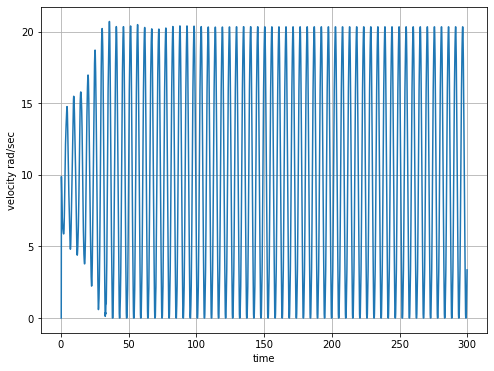

In [40]:
dt=0.13734046326462182
t=300


plt.figure(figsize=(8,6))
plt.plot(np.arange(dt,t-dt,dt),vell,label='deterministic _response')

plt.grid()
plt.xlabel('time')
plt.ylabel('velocity rad/sec')





In [38]:
# for running monte  carlo simuations


sample=100   # numember of samples required

ss_mc=[]
vel_mc=[]
dep_mc=[]
mu_mc=[]
exi_mc=[]

for i in range(sample):
    ss_sample,vel_sample,dep_sample,mu_sample,exi_sample=string(10,5000,1)
    ss_mc.append(ss_sample)
    vel_mc.append(vel_sample)
    dep_mc.append(dep_sample)
    mu_mc.append(mu_sample)
    exi_mc.append(exi_sample)
   



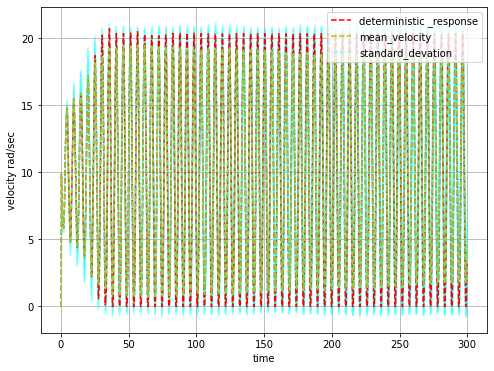

In [35]:


dt=0.13734046326462182
vel_mc=np.asarray(vel_mc)
dep_mc=np.asarray(dep_mc)
exi_mc=np.asarray(exi_mc)
mu_mc=np.asarray(mu_mc)

vel_random = [np.mean(k) for k in zip(*vel_mc)]
#vel_random=np.mean(vel_mc, axis=0)
dep_random=np.mean(dep_mc, axis=0)
exi_random=np.mean(exi_mc, axis=0)
mu_random=np.mean(mu_mc, axis=0)

vel_std=np.std(vel_mc, axis=0)




t=300


plt.figure(figsize=(8,6))


plt.plot(np.arange(dt,t-dt,dt),vell,'--r',label='deterministic _response')
plt.plot(np.arange(dt,t-dt,dt), vel_random,'--y',label='mean_velocity')
plt.errorbar(np.arange(dt,t-dt,dt),vel_random ,yerr=vel_std, fmt='cyan',alpha=0.2,label='standard_devation')
plt.grid()
plt.xlabel('time')
plt.ylabel('velocity rad/sec')
#plt.axis([40, 60,10, 20])
plt.legend()


# sns.distplot(exi_mc, hist=True, kde=True, 
#              bins=int(180/5), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 1})



#plt.savefig('200_std_half',bbox_inches='tight',pad_inches = 0)

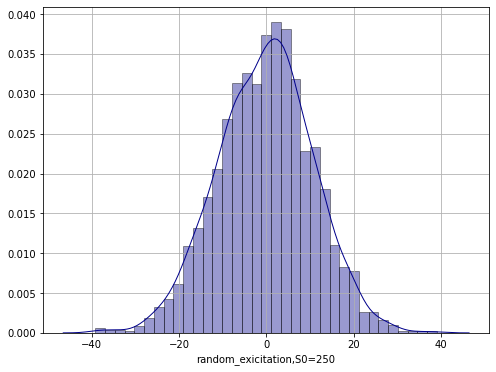

In [33]:
plt.figure(figsize=(8,6))
ax=sns.distplot(exi_random, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

ax.set(xlabel='random_exicitation,S0=250')


plt.grid()
plt.show()
#plt.savefig('200_exi',bbox_inches='tight',pad_inches = 0)

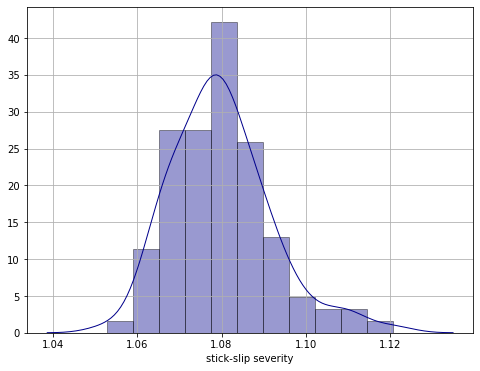

In [34]:
plt.figure(figsize=(8,6))
ax=sns.distplot(ss_mc, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

ax.set(xlabel='stick-slip severity')
plt.grid()
plt.show()





#plt.savefig('200_ss',bbox_inches='tight',pad_inches = 0)

In [ ]:
# code for senstivity analyis 


# RPM=np.arange(2,30,1)
# wob=np.arange(1000,20000,1000)

# x,y=np.meshgrid(RPM,wob)
# SS=np.zeros((len(RPM),len(wob)))


# for i in range(len(RPM)):
#     for j in range(len(wob)):
#         SS[i,j]=string(RPM[i],wob[j])

# fig = plt.figure()
# fig.set_size_inches(8, 6)
# ax = fig.gca(projection='3d')
# ax.set_title('simualtion time in seconds')
# ax.plot_surface(x, y,np.transpose(SS),cmap=cm.coolwarm)
# ax.set_xlabel('RPM')
# ax.set_ylabel('WOB')
# ax.set_zlabel('Stick Slip severity')

# plt.savefig('1',bbox_inches='tight',pad_inches = 0)

# data={'rpm': x.flatten(),
#         'wob':y.flatten(),
#         'ss':SS.flatten('F')
#         }

# df=pd.DataFrame(data, columns =['rpm','wob','ss'])

# df.to_csv("sensitvity.csv", header=None)
